In [125]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
def read_data(read_file):
    df = pd.read_csv(read_file, low_memory=False)
#     df.columns = ["Timestamp", "LineID", "JourneyPatternID", "TimeFrame", 
#                   "VehicleJourneyID", "Lon", "Lat", "VehicleID", "StopID", 
#                   "AtStop", "HumanTime", "Day", "Hour", "JourneyGroup", "Runtime"]

    return df

In [127]:
def read_schedule(schedule_file):
    schedule = pd.read_csv(schedule_file, low_memory=False, encoding="ISO-8859-1")
    
    return schedule


In [128]:
def clean_df(df):
    # Dropping null values
    df = df.dropna()
    
    # Convert LineID to str
    df['LineID'] = df['LineID'].astype('str')
    
    return df


In [129]:
def clean_schedule(schedule):
    
    # drop null values
    schedule.dropna(0, inplace=True)
    
    # extract StopID
    schedule["StopID"] = schedule['stop_id'].apply(lambda x: x[-4:])
    
    # Convert StopIDs back to int
    schedule['StopID'] = schedule['StopID'].astype('int64')
    
    # Extracting LineID from trip_id
    schedule["LineID"] = schedule["trip_id"].str.extract('\-(.*?)\-')
    
    # Extracting direction from trip_id
    schedule["Direction"] = schedule['trip_id'].apply(lambda x: x[-1:])
    
    # Dropping non-major journeypatterns
    schedule = schedule[(schedule.Direction == "I") | (schedule.Direction == "O")]
    
    # Converting Direction to JourneyPatternID
    schedule["JourneyPatternID"] = schedule['Direction'].apply(lambda x: "1001" if x == "I" else "0001")
    schedule['JourneyPatternID'] = schedule['JourneyPatternID'].astype('int64')
    
    # dropping irrelevant columns
    for column in ['trip_id', 'stop_id', 'arrival_time', 'departure_time', 
                   'shape_dist_traveled', 'Direction', 'stop_sequence', 'stop_headsign']:
            schedule = schedule.drop(column, 1)
            
    # Renaming 'Long' to 'Lon'
    schedule = schedule.rename(columns={'Long': 'Lon'})
    
    return schedule

In [130]:
def get_common_stops(df, schedule, common_stops):
#     line = str(df['LineID'].iloc[0])
    line = df['LineID'].iloc[0]

    
    print(line)
    
    schedule_in = schedule[(schedule.LineID == line) & (schedule.JourneyPatternID == 1001)]
    schedule_out = schedule[(schedule.LineID == line) & (schedule.JourneyPatternID == 1)]
    df_1001 = df[df.JourneyPatternID == 1001]
    df_0001 = df[df.JourneyPatternID == 1]

    stops_in = set(schedule_in.StopID.unique())
    stops_out = set(schedule_out.StopID.unique())

    stops_1001 = set(df_1001.StopID.unique())
    stops_0001 = set(df_0001.StopID.unique())
    
    print("Difference 1001", len(stops_in ^ stops_1001))
    print("Difference 0001", len(stops_out ^ stops_0001))
    
    instops = stops_in & stops_1001
    outstops = stops_out & stops_0001

    allstops = instops | outstops
    
    return (allstops | common_stops)
    

In [131]:
def save_stops(schedule, stops, write_file):
    stops = list(stops)
    schedule = schedule[schedule.StopID.isin(stops)]
    
    schedule.to_csv(write_file)

In [132]:
def main(read_directory, schedule_file, write_file):
    
    schedule = read_schedule(schedule_file)
    schedule = clean_schedule(schedule)
    
    common_stops = set()
    
    for read_file in os.listdir(read_directory):
        if read_file.endswith(".csv"):
            print("Reading", read_file, "from", read_directory)
            
            df = read_data(read_directory + read_file)
            df = clean_df(df)
            common_stops = get_common_stops(df, schedule, common_stops)
            
        print("Finished", read_file)
        print()
        
    save_stops(schedule, common_stops, write_file)

    print("Finished main!")    

In [133]:
read_directory = "bus_data/clean_data4/"

schedule_file = 'bus_data/dublinbus_scheduledData2013csv.csv'
write_file = 'bus_data/static_data2/stops.csv'

main(read_directory, schedule_file, write_file)

/Users/danieljordan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


Reading 1.csv from bus_data/clean_data4/
1
Difference 1001 6
Difference 0001 0
Finished 1.csv

Reading 104.csv from bus_data/clean_data4/
104
Difference 1001 2
Difference 0001 31
Finished 104.csv

Reading 11.csv from bus_data/clean_data4/
11
Difference 1001 64
Difference 0001 4
Finished 11.csv

Reading 111.csv from bus_data/clean_data4/
111
Difference 1001 8
Difference 0001 9
Finished 111.csv

Reading 114.csv from bus_data/clean_data4/
114
Difference 1001 30
Difference 0001 1
Finished 114.csv

Reading 116.csv from bus_data/clean_data4/
116
Difference 1001 12
Difference 0001 8
Finished 116.csv

Reading 118.csv from bus_data/clean_data4/
118
Difference 1001 8
Difference 0001 0
Finished 118.csv

Reading 120.csv from bus_data/clean_data4/
120
Difference 1001 13
Difference 0001 13
Finished 120.csv

Reading 123.csv from bus_data/clean_data4/
123
Difference 1001 1
Difference 0001 0
Finished 123.csv

Reading 13.csv from bus_data/clean_data4/
13
Difference 1001 3
Difference 0001 5
Finished 13.c

In [112]:
read_directory = "bus_data/clean_data4/"
data_file = "46A.csv"

schedule_file = 'bus_data/dublinbus_scheduledData2013csv.csv'

df = read_data(read_directory + data_file)
schedule = read_schedule(schedule_file)

In [113]:
df = clean_df(df)
schedule = clean_schedule(schedule)

/Users/danieljordan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [114]:
common_stops = set()

print(len(get_common_stops(df, schedule, common_stops)))

46A
Difference 1001 5
Difference 0001 4
114


### Static Variables

In [30]:
line = "15"

### Extracting Data

In [31]:
df = pd.read_csv("bus_data/clean_data2/" + line + ".csv", low_memory=False, header=None)
df.columns = ["Timestamp", "LineID", "JourneyPatternID", "TimeFrame", 
              "VehicleJourneyID", "Lon", "Lat", "VehicleID", "StopID", 
              "AtStop", "HumanTime", "Day", "Hour", "JourneyGroup", "Runtime"]

#convert StopID to string

# df['StopID'] = df['StopID'].astype('str')


df.shape

(514482, 15)

In [38]:
schedule = pd.read_csv("bus_data/dublinbus_scheduledData2013csv.csv", low_memory=False, encoding="ISO-8859-1")


In [39]:
# Dropping null values - some in our dataframe are marked as 'null' (string) for some reason?
schedule = schedule.dropna()
# df = df[df.StopID != 'null']
df = df.dropna()

### Exploring schedule

In [41]:
# Extracting StopID from stop_id

# schedule["StopID"] = schedule['stop_id'].apply(lambda x: get_stop(x))
schedule["StopID"] = schedule['stop_id'].apply(lambda x: x[-4:])

# Convert StopIDs back to int
schedule['StopID'] = schedule['StopID'].astype('int64')


In [42]:
# Extracting LineID from trip_id

schedule["LineID"] = schedule["trip_id"].str.extract('\-(.*?)\-')

/Users/danieljordan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


In [43]:
# Extracting direction from trip_id
schedule["Direction"] = schedule['trip_id'].apply(lambda x: x[-1:])

In [48]:
# Dropping non-major journeypatterns
schedule = schedule[(schedule.Direction == "I") | (schedule.Direction == "O")]

In [49]:
# Converting Direction to JourneyPatternID

schedule["JourneyPatternID"] = schedule['Direction'].apply(lambda x: "1001" if x == "I" else "0001")
schedule['JourneyPatternID'] = schedule['JourneyPatternID'].astype('int64')

In [50]:
# dropping irrelevant columns
for column in ['trip_id', 'stop_id', 'arrival_time', 'departure_time', 'shape_dist_traveled', 'Direction']:
        schedule = schedule.drop(column, 1)

In [51]:
# Examining how many stops there are in either direction in schedule

schedule_line = schedule[schedule.LineID == line]
directions = schedule_line.JourneyPatternID.unique()

df_stops = {}

for direction in directions:
    direction_count = schedule_line[schedule_line.JourneyPatternID == direction].StopID.nunique()
    print(direction, direction_count)

1 72
1001 68


### Exploring line 15

In [52]:
# Examining how many stops there are in either direction in df

variants = df.JourneyPatternID.unique()

for variant in variants:
    stop_count = df[df.JourneyPatternID == variant].StopID.nunique()
    print(variant, stop_count)

1 72
1001 68


### Comparing Schedule to our data


In [53]:
schedule_in = schedule[(schedule.LineID == line) & (schedule.JourneyPatternID == 1001)]
schedule_out = schedule[(schedule.LineID == line) & (schedule.JourneyPatternID == 1)]
df_1001 = df[df.JourneyPatternID == 1001]
df_0001 = df[df.JourneyPatternID == 1]


stops_in = set(schedule_in.StopID.unique())
stops_out = set(schedule_out.StopID.unique())

stops_1001 = set(df_1001.StopID.unique())
stops_0001 = set(df_0001.StopID.unique())

# print(len(set1.difference(set2)))


In [54]:
# symmetric difference between both sets of stops

print(stops_in ^ stops_1001)
print(stops_out ^ stops_0001)


{7236, 7244}
set()


In [55]:
schedule_out.stop_headsign.unique()

array(['Ballycullen Road', 'Hawkins St'], dtype=object)

### Drop all stops that aren't in both dataframes

In [18]:
instops = list(stops_in & stops_1001)
outstops = list(stops_out & stops_0001)

allstops = instops + outstops

In [19]:
print(len(instops))
print(len(outstops))
print(len(allstops))

63
59
122


In [20]:
# have to do this part on a line by line basis. 

# df = df[df.StopID.isin(allstops)]
# schedule = schedule[schedule.StopID.isin(allstops)]

### Saving CSV with true stop locations

In [21]:
# Renaming Long to Lon, so it cooperates with our other data
schedule = schedule.rename(columns={'Long': 'Lon'})

In [22]:
stop_locations = schedule[['StopID', 'Lat', 'Lon']]
stop_locations.shape

(921993, 3)

In [23]:
stop_locations = stop_locations.drop_duplicates()
stop_locations.shape

(4719, 3)

In [25]:
# stop_locations.to_csv("bus_data/stop_locations.csv", index=False)

### ---Rough Work---

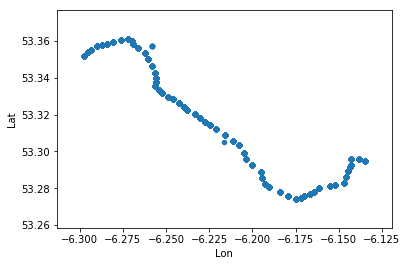

In [29]:
plotdf = schedule[(schedule.LineID == "46A") & (schedule.JourneyPatternID == 1)][["Lon", "Lat"]]
plotdf.plot.scatter(x="Lon", y="Lat")

In [41]:
out = df[df.JourneyPatternID == 1]

out = out.groupby(['StopID'])['Runtime'].mean().reset_index()

# out
out.sort_values(['Runtime'])


,StopID,Runtime
14,807,-63.045968
15,808,174.199164
16,809,205.947537
17,810,285.002447
18,811,355.086284
19,812,403.099066
20,813,434.422817
21,814,527.628022
0,81,698.811580
22,817,796.512141
